In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
file_path = 'data/experiment-totalV.csv'
df = pd.read_csv(file_path)

# 使用numpy分割数据框
num_cols = df.shape[1]
split_dfs = np.split(df, num_cols // 4, axis=1)

# 删除每组的第一个元素（列）
split_dfs = [df_group.drop(df_group.columns[0], axis=1) for df_group in split_dfs]

# 创建一个字典，将键从20分配给每个组,观测范围
result_dict = {}
key_start = 0

for i, split_df in enumerate(split_dfs):
    # 将数据框转换为列表形式
    split_list = split_df.values.tolist()
    # 将列表存储到字典中
    key = key_start + i
    key_r = round(key,2)
    result_dict[key_r] = split_list

# 显示最终字典
print(result_dict)

{0: [[0, 0, 0]], 1: [[2, 5, 0]], 2: [[2, 6, 2]], 3: [[3, 8, 3]], 4: [[8, 5, 9]], 5: [[7, 6, 7]], 6: [[6, 4, 9]], 7: [[5, 4, 12]], 8: [[6, 4, 14]], 9: [[15, 5, 8]], 10: [[6, 2, 13]], 11: [[9, 5, 12]], 12: [[3, 2, 4]], 13: [[6, 2, 11]], 14: [[4, 0, 9]], 15: [[7, 0, 6]], 16: [[5, 0, 10]], 17: [[11, 0, 11]], 18: [[12, 0, 7]], 19: [[9, 1, 11]], 20: [[10, 0, 9]], 21: [[11, 0, 6]], 22: [[10, 0, 4]], 23: [[13, 0, 7]], 24: [[12, 0, 6]], 25: [[16, 0, 6]], 26: [[21, 0, 7]], 27: [[24, 0, 7]], 28: [[18, 0, 5]], 29: [[18, 0, 3]], 30: [[16, 0, 4]]}


/opt/conda/lib/python3.11/site-packages/numpy/core/fromnumeric.py:57: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


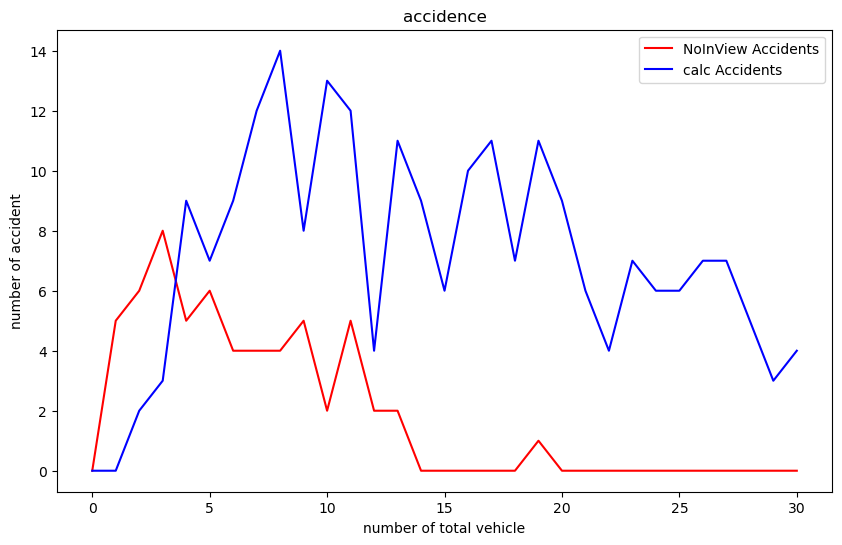

In [3]:
# 提取x轴（keys）和y轴（每个list的第二个元素）
x_values = list(result_dict.keys())
y_values = [value[0][1] for value in result_dict.values()]  # 假设只取每组中第一行的第二个元素
# print(y_values)

# 提取y轴（每个list的第3个元素）
y2_values = [value[0][2] for value in result_dict.values()]  # 假设只取每组中第一行的第二个元素
# print(y2_values)

# 创建图表
plt.figure(figsize=(10, 6))
plt.plot(x_values, y_values, marker='', linestyle='-', color='r', label='NoInView Accidents')
plt.plot(x_values, y2_values, marker='', linestyle='-', color='b', label='calc Accidents')

# 设置标题和标签
plt.title('accidence')
plt.xlabel('number of total vehicle')
plt.ylabel('number of accident')
plt.legend()

# 显示图表
plt.show()

回归系数 (Slope): -0.33516483516483514
截距 (Intercept): 6.8076923076923075
均方误差 (Mean Squared Error): 1.291208791208791
R² (Coefficient of Determination): 0.5491440377804016
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.549
Model:                            OLS   Adj. R-squared:                  0.508
Method:                 Least Squares   F-statistic:                     13.40
Date:                Tue, 20 Aug 2024   Prob (F-statistic):            0.00375
Time:                        16:07:33   Log-Likelihood:                -20.107
No. Observations:                  13   AIC:                             44.21
Df Residuals:                      11   BIC:                             45.34
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err         

/opt/conda/lib/python3.11/site-packages/scipy/stats/_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=13
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


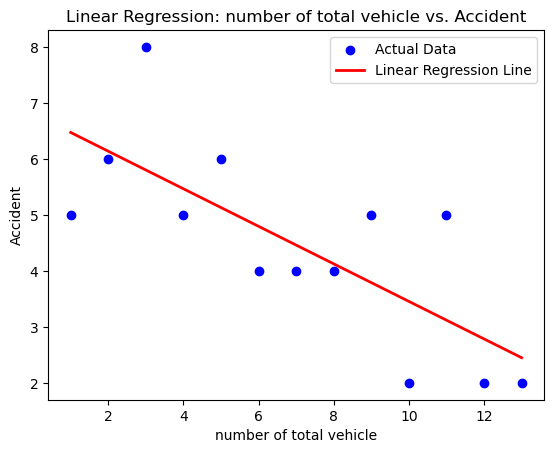

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm

# 示例数据
# 假设你有两个列表，一个是观测距离，另一个是对应的交通事故概率
observation_distance = np.array(x_values[1:14]).reshape(-1, 1)
#排除0
accident_probability = np.array(y_values[1:14])

# 创建线性回归模型
model = LinearRegression()

# 拟合模型
model.fit(observation_distance, accident_probability)

# 预测值
predicted_probabilities = model.predict(observation_distance)

# 输出回归系数
print(f"回归系数 (Slope): {model.coef_[0]}")
print(f"截距 (Intercept): {model.intercept_}")

# 计算模型性能
mse = mean_squared_error(accident_probability, predicted_probabilities)
r2 = r2_score(accident_probability, predicted_probabilities)
print(f"均方误差 (Mean Squared Error): {mse}")
print(f"R² (Coefficient of Determination): {r2}")

# 使用 statsmodels 计算 p 值
X = sm.add_constant(observation_distance)  # 添加常数项（截距）
model_sm = sm.OLS(accident_probability, X).fit()
print(model_sm.summary())

# 可视化回归结果
plt.scatter(observation_distance, accident_probability, color='blue', label='Actual Data')
plt.plot(observation_distance, predicted_probabilities, color='red', linewidth=2, label='Linear Regression Line')
plt.xlabel('number of total vehicle')
plt.ylabel('Accident')
plt.title('Linear Regression: number of total vehicle vs. Accident')
plt.legend()
plt.show()

R²: 0.6166
Adjusted R²: 0.5740
Mean Squared Error (MSE): 4.9244
Root Mean Squared Error (RMSE): 2.2191


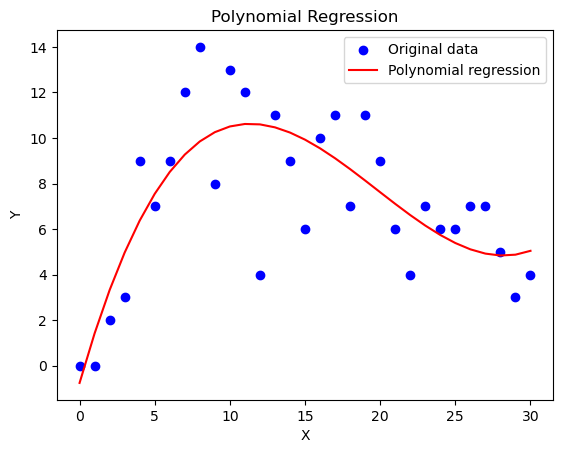

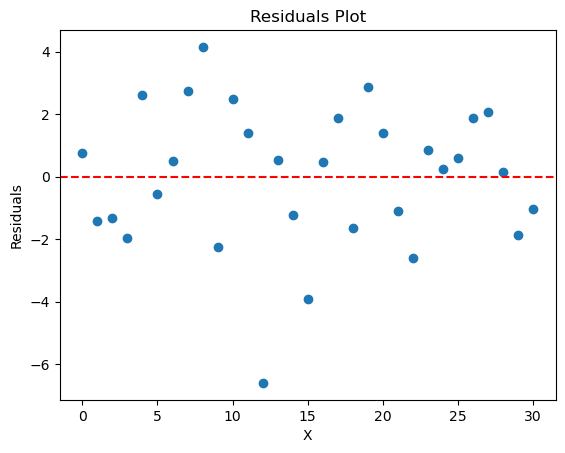

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

# 示例数据
x = np.array(x_values)
y = np.array(y2_values)

# 将x数组转换为二维数组，因为sklearn的模型要求输入特征是二维的
x = x.reshape(-1, 1)

# 创建多项式特征，degree=2表示二次多项式
poly = PolynomialFeatures(degree=3)
x_poly = poly.fit_transform(x)

# 创建线性回归模型并拟合多项式特征
model = LinearRegression()
model.fit(x_poly, y)

# 进行预测
y_pred = model.predict(x_poly)

# 计算评估指标
r2 = r2_score(y, y_pred)
mse = mean_squared_error(y, y_pred)
rmse = np.sqrt(mse)

# 调整后的R²计算
n = len(y)  # 样本数量
p = x_poly.shape[1] - 1  # 模型中的特征数量（包括多项式生成的特征）
adjusted_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)

# 输出评估结果
print(f'R²: {r2:.4f}')
print(f'Adjusted R²: {adjusted_r2:.4f}')
print(f'Mean Squared Error (MSE): {mse:.4f}')
print(f'Root Mean Squared Error (RMSE): {rmse:.4f}')

# 可视化回归曲线
plt.scatter(x, y, color='blue', label='Original data')
plt.plot(x, y_pred, color='red', label='Polynomial regression')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Polynomial Regression')
plt.legend()
plt.show()

# 残差分析
residuals = y - y_pred
plt.scatter(x, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('X')
plt.ylabel('Residuals')
plt.title('Residuals Plot')
plt.show()


R²: 0.5795
Adjusted R²: 0.4394
Mean Squared Error (MSE): 1.2042
Root Mean Squared Error (RMSE): 1.0974


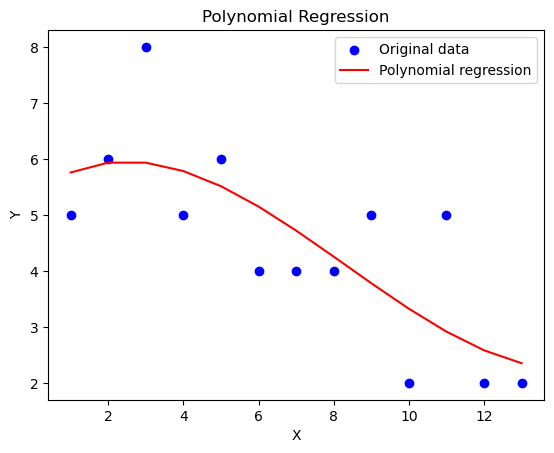

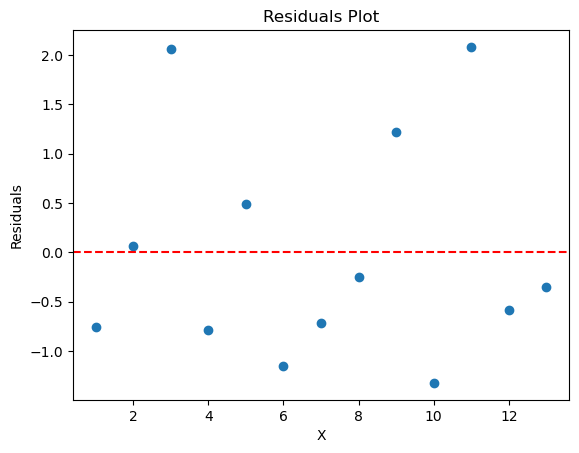

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

# 示例数据
x = np.array(x_values[1:14])
y = np.array(y_values[1:14])

# 将x数组转换为二维数组，因为sklearn的模型要求输入特征是二维的
x = x.reshape(-1, 1)

# 创建多项式特征，degree=2表示二次多项式
poly = PolynomialFeatures(degree=3)
x_poly = poly.fit_transform(x)

# 创建线性回归模型并拟合多项式特征
model = LinearRegression()
model.fit(x_poly, y)

# 进行预测
y_pred = model.predict(x_poly)

# 计算评估指标
r2 = r2_score(y, y_pred)
mse = mean_squared_error(y, y_pred)
rmse = np.sqrt(mse)

# 调整后的R²计算
n = len(y)  # 样本数量
p = x_poly.shape[1] - 1  # 模型中的特征数量（包括多项式生成的特征）
adjusted_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)

# 输出评估结果
print(f'R²: {r2:.4f}')
print(f'Adjusted R²: {adjusted_r2:.4f}')
print(f'Mean Squared Error (MSE): {mse:.4f}')
print(f'Root Mean Squared Error (RMSE): {rmse:.4f}')

# 可视化回归曲线
plt.scatter(x, y, color='blue', label='Original data')
plt.plot(x, y_pred, color='red', label='Polynomial regression')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Polynomial Regression')
plt.legend()
plt.show()

# 残差分析
residuals = y - y_pred
plt.scatter(x, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('X')
plt.ylabel('Residuals')
plt.title('Residuals Plot')
plt.show()
